<a href="https://colab.research.google.com/github/MKdul/google-colab/blob/main/alphabet_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
data_to_load1 = files.upload()

Saving image.npz to image.npz


In [ ]:
from google.colab import files
labels_to_load = files.upload()

Saving labels_for_alphabet_recog.csv to labels_for_alphabet_recog (1).csv


In [ ]:
X = np.load('image.npz')['arr_0']
y = pd.read_csv('labels_for_alphabet_recog.csv')["labels"]

print(pd.Series(y).value_counts())

classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
n_classes = len(classes)

X    550
U    550
Q    550
D    550
I    550
F    550
J    550
W    550
P    550
B    550
S    550
M    550
V    550
G    550
Y    550
R    550
L    550
N    550
K    550
T    550
Z    550
C    550
E    550
A    550
O    550
H    550
Name: labels, dtype: int64


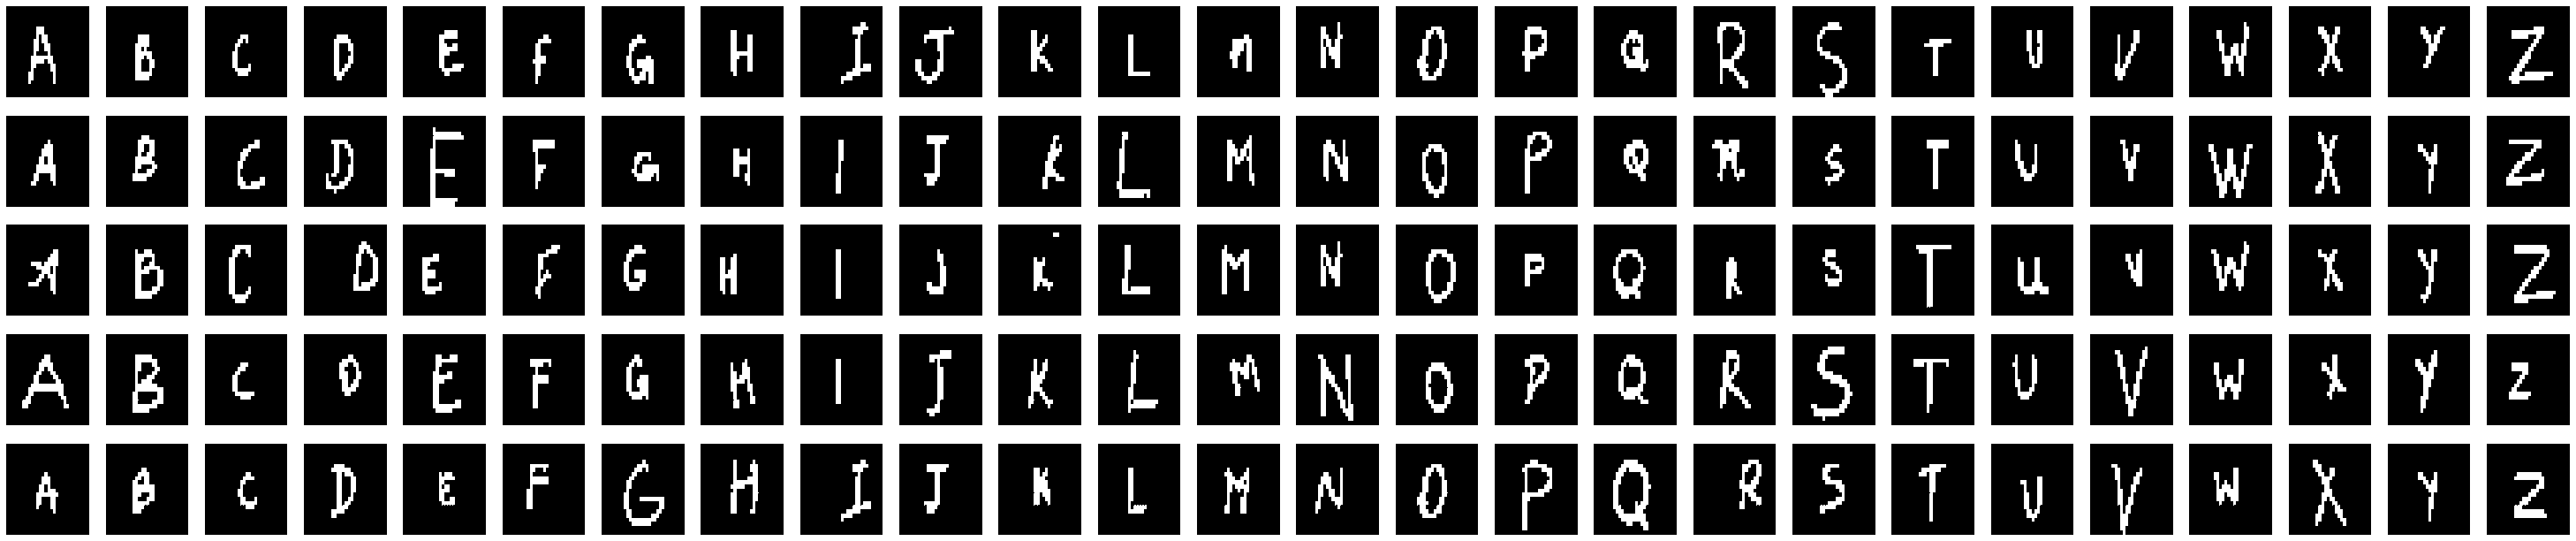

In [ ]:
samples_per_class = 5

fig = plt.figure(figsize = (n_classes*2, (1+samples_per_class*2)))
idx_cls = 0

for cls in classes:
    idx = np.flatnonzero(y == cls)
    idx = np.random.choice(idx, samples_per_class, replace = False)
    i = 0
    for id in idx:
        plt_idx = (i*n_classes+idx_cls+1)
        p = plt.subplot(samples_per_class, n_classes, plt_idx)
        p = sns.heatmap(np.reshape(X[id], (22, 30)), cmap = plt.cm.gray, xticklabels = False, yticklabels = False, cbar = False)
        p = plt.axis('off')
        i+=1
    idx_cls+=1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9, train_size = 7500, test_size = 2500)

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

clf = LogisticRegression(solver = 'saga', multi_class = 'multinomial').fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy is {accuracy*100} %")

accuracy is 99.52 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


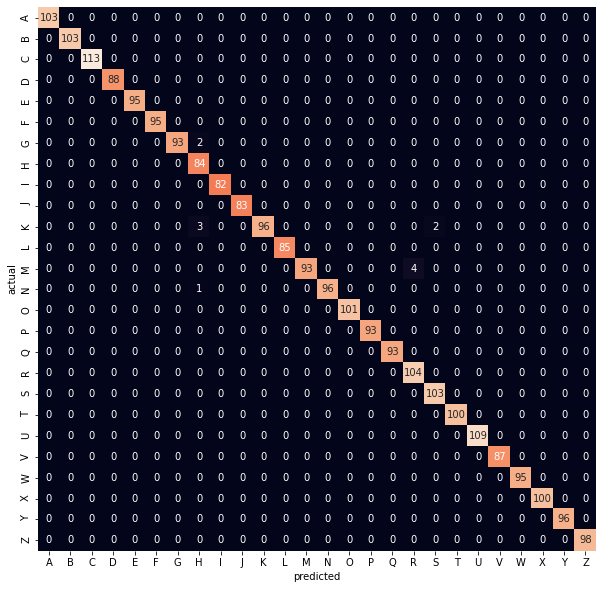

In [ ]:
cm = pd.crosstab(y_test, y_pred, rownames = ['actual'], colnames = ['predicted'])
p = plt.figure(figsize = (10, 10))
p = sns.heatmap(cm, annot = True, fmt = "d", cbar = False)